#Дипломная работа по курсу "Python для анализа данных"

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view 

1. satisfaction_level​ - Уровень удовлетворенности работой
2. Last_evaluation ​- Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​- отдел в котором работает сотрудник
10. salary​ - относительный уровень зарплаты


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Задание 1
Загрузите файл HR.csv в pandas dataframe

In [ ]:
# для удобства загрузил файл на свой хостинг
df = pd.read_csv('https://anton-at-work.ru/files-for-study/HR.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df_dismissed = df[df['left'] == 1] # уволенные сотрудники
df_current = df[df['left'] == 0] # действующие сотрудники

##Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
def show_column_stat(dataframe, column_name):
  print(column_name + ':')
  col = dataframe[column_name]
  try:
    min = col.min()
    print('\tmin:', min)
  except:
    pass
  try:
    max = col.max()  
    print('\tmax:', max)
  except:
    pass
  try:
    range = max - min
    print('\trange:', range)
  except:
    pass
  try:
    mean = col.mean()  
    print('\tmean:', mean)
  except:
    pass
  try:
    mode = col.mode()[0]
    print('\tmode:', mode)
  except:
    pass    
  try:
    median = col.median()
    print('\tmedian:', median)
  except:
    pass  
  try:
    std = col.std()
    print('\tstd:', std)
  except:
    pass   
  try:
    var = col.var()
    print('\tvar:', var)
  except:
    pass    
  try:         
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lo_outlier = q1 - (1.5 * iqr) 
    hi_outlier = q3 + (1.5 * iqr)
    print('\tlo_outlier:', lo_outlier)
    print('\thi_outlier:', hi_outlier)
  except:
    pass   
  try:
    na_count = col.isna().sum()
    print('\tna_count:', na_count)
  except:
    pass       
  print('')

# для каждого столбца выводим статистические показатели
for col in df.columns:
  show_column_stat(df, col)

satisfaction_level:
	min: 0.09
	max: 1.0
	range: 0.91
	mean: 0.6128335222348166
	mode: 0.1
	median: 0.64
	std: 0.2486306510611418
	var: 0.061817200647087255
	lo_outlier: -0.12999999999999995
	hi_outlier: 1.39
	na_count: 0

last_evaluation:
	min: 0.36
	max: 1.0
	range: 0.64
	mean: 0.7161017401159978
	mode: 0.55
	median: 0.72
	std: 0.17116911062327592
	var: 0.02929886443156327
	lo_outlier: 0.09500000000000014
	hi_outlier: 1.335
	na_count: 0

number_project:
	min: 2
	max: 7
	range: 5
	mean: 3.80305353690246
	mode: 4
	median: 4.0
	std: 1.2325923553183857
	var: 1.5192839143893255
	lo_outlier: 0.0
	hi_outlier: 8.0
	na_count: 0

average_montly_hours:
	min: 96
	max: 310
	range: 214
	mean: 201.0503366891126
	mode: 135
	median: 200.0
	std: 49.943099371284305
	var: 2494.313174809979
	lo_outlier: 22.5
	hi_outlier: 378.5
	na_count: 0

time_spend_company:
	min: 2
	max: 10
	range: 8
	mean: 3.498233215547703
	mode: 3
	median: 3.0
	std: 1.4601362305354546
	var: 2.1319978117222864
	lo_outlier: 1.5
	hi_o

##Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [ ]:
df.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
df.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


In [ ]:
df.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


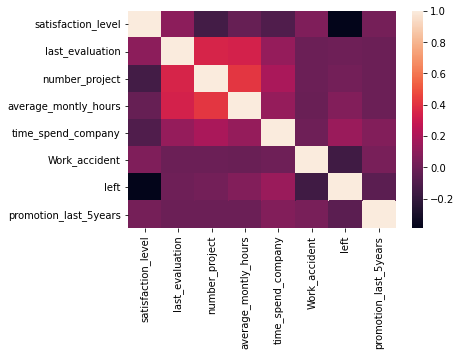

In [ ]:
# тепловая карта корреляции
sns.heatmap(df.corr())

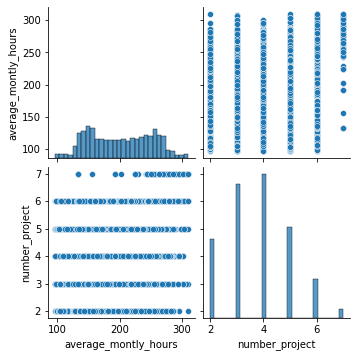

In [ ]:
# две самые скоррелированные переменные
sns.pairplot(df[['average_montly_hours', 'number_project']])

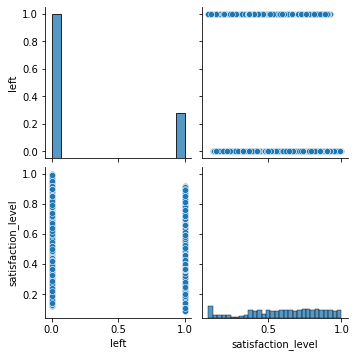

In [ ]:
#две самые наименеескоррелированные переменные
sns.pairplot(df[['left', 'satisfaction_level']])

##Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
# с учётом уволенных
df.value_counts(subset=['department']) 

department 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

In [ ]:
# только действующие
df_current.value_counts(subset=['department']) 

department 
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
dtype: int64

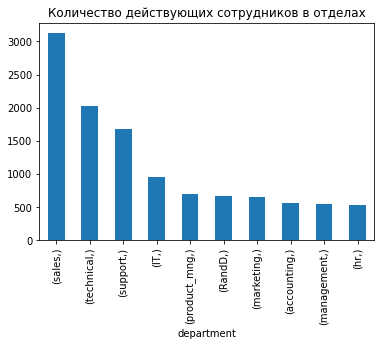

In [ ]:
df_current.value_counts(subset=['department']) .plot(kind='bar', title='Количество действующих сотрудников в отделах')

## Задание 5
Показать распределение сотрудников по зарплатам.

In [ ]:
def get_num(salary):
  result = 0
  if salary == 'medium':
    result = 1
  elif  salary == 'high':
    result = 2
  return result 

def is_that_salary(salary, that_salary):
  result = 0
  if salary == that_salary:
    result = 1
  return result   

# добавляю вычисленные значения для упрощения построения графиков
df['numeric_salary'] = df['salary'].apply(get_num)
df['low_salary'] = df['salary'].apply(is_that_salary, that_salary = 'low')
df['medium_salary'] = df['salary'].apply(is_that_salary, that_salary = 'medium')
df['high_salary'] = df['salary'].apply(is_that_salary, that_salary = 'high')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,numeric_salary,low_salary,medium_salary,high_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0,0


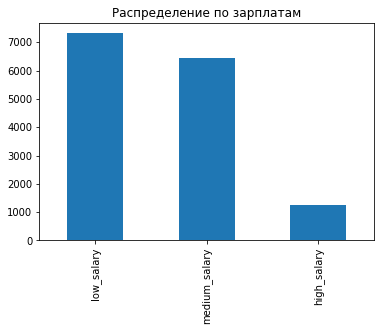

In [ ]:
df[['low_salary', 'medium_salary', 'high_salary']].sum().plot(kind='bar', title='Распределение по зарплатам')

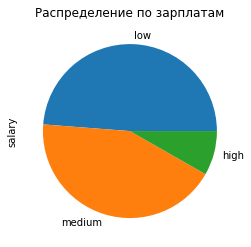

In [ ]:
pie_data = df['salary'].value_counts()
pie_data.plot(kind='pie', title='Распределение по зарплатам')

## Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
df_group_dept = df[['department', 'low_salary', 'medium_salary', 'high_salary']].groupby('department').sum()
df_group_dept

,low_salary,medium_salary,high_salary
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


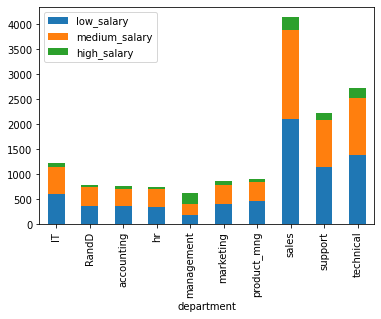

In [ ]:
df_group_dept.plot(kind='bar', stacked=True)

Нормализуем, приводим к процентам

In [ ]:
def get_dept_salary_percent(row):
    all = row['low_salary'] + row['medium_salary'] + row['high_salary']
    row['low_salary_percent'] = (row['low_salary'] * 100) / all
    row['medium_salary_percent'] = (row['medium_salary'] * 100) / all
    row['high_salary_percent'] = (row['high_salary'] * 100) / all
        
    return row

df_group_dept_percent = df_group_dept.apply(get_dept_salary_percent, axis=1)  
df_group_dept_percent

,low_salary,medium_salary,high_salary,low_salary_percent,medium_salary_percent,high_salary_percent
department,,,,,,
IT,609.0,535.0,83.0,49.633252,43.602282,6.764466
RandD,364.0,372.0,51.0,46.251588,47.268107,6.480305
accounting,358.0,335.0,74.0,46.675359,43.676662,9.647979
hr,335.0,359.0,45.0,45.331529,48.579161,6.089310
management,180.0,225.0,225.0,28.571429,35.714286,35.714286
marketing,402.0,376.0,80.0,46.853147,43.822844,9.324009
product_mng,451.0,383.0,68.0,50.000000,42.461197,7.538803
sales,2099.0,1772.0,269.0,50.700483,42.801932,6.497585
support,1146.0,942.0,141.0,51.413190,42.261104,6.325707


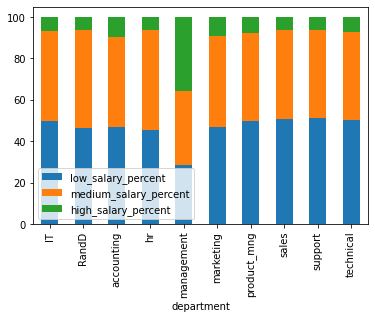

In [ ]:
df_group_dept_percent[['low_salary_percent', 'medium_salary_percent', 'high_salary_percent']].plot(kind='bar', stacked=True)

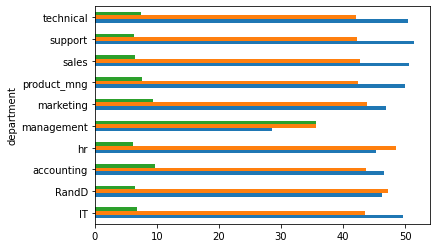

In [ ]:
# чуть-чуть по-другому визуализируем
df_group_dept_percent[['low_salary_percent', 'medium_salary_percent', 'high_salary_percent']].plot(kind='barh', legend=None)

В процентном соотношении в отделе менеджмента больше высокооплачиваемых сотрудников

## Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
df_group_hours_mean = df[['average_montly_hours', 'salary']].groupby('salary').mean()
df_group_hours_mean

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


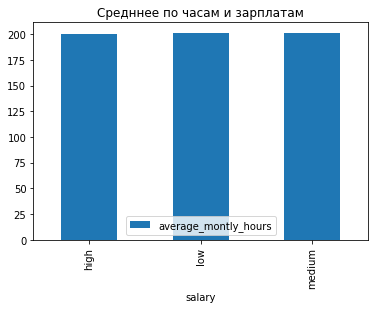

In [ ]:
df_group_hours_mean.reset_index().plot(kind='bar', x='salary', y='average_montly_hours', title='Средннее по часам и зарплатам')

In [ ]:
df_group_hours_median = df[['average_montly_hours', 'salary']].groupby('salary').median()
df_group_hours_median

,average_montly_hours
salary,
high,199
low,199
medium,201


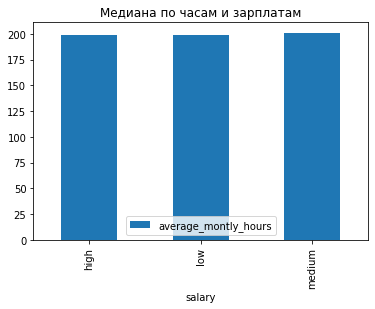

In [ ]:
df_group_hours_median.reset_index().plot(kind='bar', x='salary', y='average_montly_hours', title='Медиана по часам и зарплатам')

In [ ]:
df[['numeric_salary', 'average_montly_hours']].corr()

,numeric_salary,average_montly_hours
numeric_salary,1.000000,-0.002242
average_montly_hours,-0.002242,1.000000


Гипотеза не подтверждается. Зарплата и проведённое на работе время особо не влияют друг на друга, кореляция не прпослеживается. Больше всего (но совсем не намного) работают люди со средней зарплатой. Люди с маленькой и высокой оплатой работают примерно одинаковое количество часов. 

## Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [ ]:
df_dismissed_promotion = df_dismissed['promotion_last_5years'].value_counts()
df_dismissed_promotion

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [ ]:
# доля сотрудников с повышением за последние 5 лет среди уволенных в процентах
(df_dismissed_promotion[1] * 100) / len(df_dismissed['promotion_last_5years'])  

0.5320638476617194

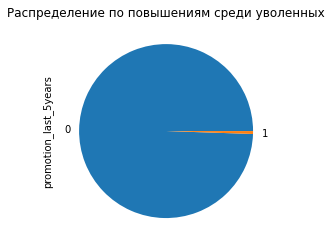

In [ ]:
df_dismissed_promotion.plot(kind='pie', 
                   title='Распределение по повышениям среди уволенных')

In [ ]:
df_current_promotion = df_current['promotion_last_5years'].value_counts()
df_current_promotion

0    11128
1      300
Name: promotion_last_5years, dtype: int64

In [ ]:
# доля сотрудников с повышением за последние 5 лет среди действующих в процентах
(df_current_promotion[1] * 100) / len(df_current['promotion_last_5years'])  

2.625131256562828

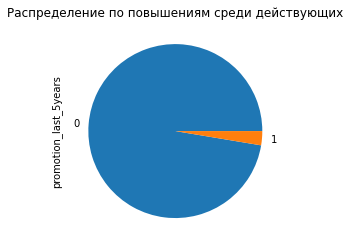

In [ ]:
df_current_promotion.plot(kind='pie', 
                   title='Распределение по повышениям среди действующих')

In [ ]:
# средняя степень удовлетворенности среди уволенных
df_dismissed['satisfaction_level'].mean()

0.44009801176140917

In [ ]:
# средняя степень удовлетворенности среди действующих
df_current['satisfaction_level'].mean()

0.666809590479516

In [ ]:
# среднее количество проектов среди уволенных
df_dismissed['number_project'].mean()

3.8555026603192384

In [ ]:
# среднее количество проектов среди действующих
df_current['number_project'].mean()

3.786664333216661

## Задание 9
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

Оценить качество модели на тестовой выборки

In [ ]:
data = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
data_class = df['left'].tolist()

# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.33)

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
4945,1,1
4946,0,0
4947,0,0
4948,1,0


In [ ]:
# расчет точности 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7575757575757576

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.45029875e+00,  7.98719345e-01, -2.61130667e-01,
         4.24679254e-03,  2.63715827e-01, -1.13713536e+00,
        -1.06962813e+00]])

## Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку


Ссылка на Гугл Колаб:
https://colab.research.google.com/drive/13gtQ0O81bym4M5tTJvnGaGgTsnCYB_4z?usp=sharing 